## Descripció

Crear base de dades amb MySQL.

## Nivell 1

**- Exercici 1:**
Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
%matplotlib inline 
from datetime import datetime, timedelta

#BBDD:
import pymysql
import MySQLdb
from sqlalchemy import create_engine




Instal.lació de Xampp per a la gestió en servidor local amb Apache de la BBDD que ens permet treballar amb phpMyAdmin que és un gestor de MySQL via web.

Genero una base de dades d'una biblioteca, on tenim la taula d'usuaris, la de llibres i la de prestecs.

In [2]:

#mirem tots els llibres que tenim a la taula de llibres
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='',db='biblioteca_socrates')
df=pd.read_sql_query("SELECT * FROM llibres",conn)


In [3]:
conn.close()

Provo d'introduir dades a la BBDD a partir d'un dataframe.

In [6]:
# generem un mètode per generar emails aleatoris a partir de nom i cognom:
import random

def email_adress_generator (name, surname):
    email=''
    servers=['@hotmail.com','@gmail.com','@gmx.net', '@yahoo.com']
    years=range(1950,2005,1)
    union =['_','.']
    union_char=union[random.randint(0, (len(union)-1))]
    j=random.randint(0, 3)
    if j==0:
        union_char2=union[random.randint(0, (len(union)-1))]
        email = name + union_char + surname + union_char2 +str(years[random.randint(0, (len(years)-1))])
    elif j==1:
        email = surname + union_char + str(years[random.randint(0, (len(years)-1))])
    elif j==2:
        email = name + union_char + str(years[random.randint(0, (len(years)-1))])
    else:
        email =name +  surname + str(random.randint(1,99))
    email = email+servers[random.randint(0, (len(servers)-1))]        
    return email

In [28]:
#Generem un dataframe de noms, cognoms i emails

df_nom_cognom=pd.read_excel('Noms i cognoms.xlsx')
df_nom_cognom.drop('Unnamed: 3',axis=1, inplace = True)
df_nom_cognom['NOMBRE']='None'
emails = []
for i in range(len (df_nom_cognom)):
    sex = random.randint(0,1)
    if sex == 0:
        df_nom_cognom.loc[i,'NOMBRE'] = df_nom_cognom.loc[i,'NOMBRES HOMBRE'].title()
    if sex == 1:
        df_nom_cognom.loc[i,'NOMBRE'] = df_nom_cognom.loc[i,'NOMBRES MUJER'].title()
    emails.append(email_adress_generator(df_nom_cognom.loc[i,'NOMBRE'],df_nom_cognom.loc[i,'APELLIDOS'].title()))
    
df_nom_cognom ['EMAIL'] = emails
df_nom_cognom ['NOMBRE'] = [x.title() for x in df_nom_cognom['NOMBRE']]
df_nom_cognom ['APELLIDOS'] = [x.title() for x in df_nom_cognom['APELLIDOS']]
df_nom_cognom.drop(['NOMBRES HOMBRE','NOMBRES MUJER','APELLIDOS.1'], axis = 1., inplace = True)
df_nom_cognom = df_nom_cognom[['NOMBRE', 'APELLIDOS', 'EMAIL']]
df_nom_cognom.columns = ['nom','cognoms','email']
df_nom_cognom.reset_index(inplace=True)
df_nom_cognom.rename(columns={"index":"ID_usuari"}, inplace=True)
df_nom_cognom.index=df_nom_cognom['ID_usuari']
df_nom_cognom.drop('ID_usuari',axis=1, inplace=True)
df_nom_cognom.head()

,nom,cognoms,email
ID_usuari,,,
0,Antonio,Garcia,Antonio_1995@yahoo.com
1,Maria Carmen,Martinez,Maria Carmen.1980@yahoo.com
2,Francisco,Lopez,Francisco_1983@gmail.com
3,Juan,Sanchez,Sanchez_1993@gmail.com
4,Manuel,Gonzalez,Manuel.Gonzalez.1980@yahoo.com


In [ ]:
#importem el dataframe directament a SQL generant una taula nova (no ha d'existir):



ruta_connexion = 'mysql+pymysql://root@localhost:3306/biblioteca_socrates'
conexion = create_engine(ruta_connexion)

df_nom_cognom.to_sql('usuaris',con=conexion)

In [39]:
#afegim clau primaria a la columna ID_usuari.
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='',db='biblioteca_socrates')
modifiy_query= "ALTER TABLE usuaris ADD PRIMARY KEY(ID_usuari);"
cursor=conn.cursor()
cursor.execute(modifiy_query)
conn.commit()
conn.close()

Generem registres de prestecs de forma aleatoria:

In [30]:
def get_rnd_date(start, end, fmt):#per generar una data aleatoria donat un marge
    
  s = datetime.strptime(start, fmt)
  e = datetime.strptime(end, fmt)
  delta = e - s
  return s + timedelta(days=(random.random() * delta.days))

In [45]:
#Extraiem el número de llibres i d'usuaris que hi han a la BBDD
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='',db='biblioteca_socrates')
cursor=conn.cursor()
num_llibres = len(pd.read_sql_query("SELECT titol FROM llibres",conn))
num_usuaris = len(pd.read_sql_query("SELECT nom FROM usuaris",conn))


In [46]:
import pyodbc

In [47]:
u=0
db=MySQLdb.connect('localhost','root', '', 'biblioteca_socrates')
while u<500:
    date_0 = get_rnd_date("01/01/1996", "01/02/2022", "%d/%m/%Y")#generem data inicial entre 1996 i 2022
    date_21= date_0 + timedelta(days=21)
    date_0_str = date_0.strftime("%Y/%m/%d")
    date_21_str = date_21.strftime("%Y/%m/%d")    
    insert_query= "INSERT INTO prestecs (llibre_ID, usuari_ID, data_deixat, data_retorn) VALUES (" + str(random.randint(1,num_llibres)) + ", "+ str(random.randint(1,num_usuaris)) + ", '"+ date_0_str + "','" + date_21_str + "');"    
    u+=1
    cursor=conn.cursor()
    cursor.execute(insert_query)
    conn.commit()
conn.close()

S'ha generat una taula amb el nom de prestecs amb 500 entrades.

Fonts d'info:
* Connentct mysql to jupyter Notebook https://www.codegrepper.com/code-examples/python/how+to+connect+mysql+database+in+jupyter+notebook
* Inserir datos de dataframe a BBDD Mysqul: https://youtu.be/ZwUYcf_zS-E

* Treballar amb datas: https://statisticsglobe.com/add-days-months-years-datetime-object-python

## Nivell 2

**- Exercici 2:**
Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.

In [9]:
#Extraiem el número de llibres i d'usuaris que hi han a la BBDD
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='',db='biblioteca_socrates')


num_llibres = len(pd.read_sql_query("SELECT titol FROM llibres",conn))
num_usuaris = len(pd.read_sql_query("SELECT nom FROM usuaris",conn))

In [10]:
#busquem aquells llibres que continguin la paraula amor i el nom de l'autor comenci per una a.
query1="SELECT * FROM llibres WHERE titol LIKE '%amor%' and autor LIKE 'a%';"

In [11]:
df_query1=pd.read_sql_query(query1,conn)

In [12]:
df_query1

,ID_llibre,titol,autor
0,4,El Amor ¡menudo caso!,Anna Mas
1,6,Amor tres delicias,Amelia Chardin
2,11,Mi amor de Wattpad,Ariana Godoy


Abans de realitzar les següents busquedes cal connectar les taules amb les claus primaries i les secundàries. També canviem els formats per a que coincideixin entre clau primaria i secundària. Jo ho he fet dintre del programa phpMyAdmin.

In [13]:
#busquem aquells usuaris que hagin tingut un llibre prestat l'agost del 2018
query2="""SELECT nom , cognoms 
FROM usuaris 
WHERE ID_usuari IN (SELECT usuari_ID 
                   FROM prestecs 
                    WHERE data_deixat>=2018/08/01 
                    AND data_deixat<2018/09/01);"""

In [14]:
df_query2=pd.read_sql_query(query2,conn)
df_query2

,nom,cognoms
0,Francisco,Lopez
1,Juan,Sanchez
2,Manuel,Gonzalez
3,Carmen,Gomez
4,Jesus,Fernandez
5,Angel,Moreno
6,Dolores,Jimenez
7,Jose Antonio,Rodriguez
8,Ana,Navarro
9,Carlos,Ruiz


## Nivell 3

 **- Exercici 3:** Genera algun gràfic que resumeixi les dades. 

Dintre de la última taula, obtenim el numero de vegades que es repeteix cada lletra en els noms i ho grafiquem.

Com que la query 2 no és massa resumible el que he fet és generar gràfics a partir de certa informació que aporta. Concretament, evaluo la repetició de les lletres en els noms obtinguts en el Query 2: 

In [16]:
abecedary=list( 'abcdefghijklmnopqrstuvwyxz')

In [32]:

my_dict, my_dict2= {}, {}
for i in abecedary:
    lista=[]  
    my_dict.update({i:0})
    for j in df_query2.nom:
        new_value=j.count(i) + my_dict[i]
        my_dict.update({i:new_value})
    lista.append(my_dict[i])
    my_dict2.update({i:lista})

In [35]:
df_letters=pd.DataFrame(my_dict2)
df_letters

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,y,x,z
0,42,0,9,2,31,2,7,0,22,0,...,1,22,25,4,16,3,0,0,0,1


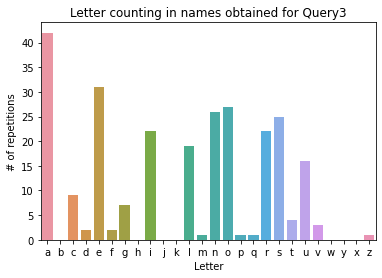

In [125]:
#Draw a bar plot 
barplot=sns.barplot(x=list (df_letters.columns), y=list(df_letters.iloc[0]))
barplot.set(title='Letter counting in names obtained for Query3')
barplot.set_xlabel('Letter')
barplot.set_ylabel('# of repetitions')
plt.show()

In [115]:
#transform dataframe to drop 0 values and sort by value (transpose columns and raws for sorting)
df_letters_no_null=df_letters.copy()
for i in df_letters_no_null.columns:
    if df_letters_no_null.iloc[0][i]==0:
        df_letters_no_null.drop(i,axis=1, inplace=True)
df_letters_no_null= df_letters_no_null.T  
df_letters_no_null.sort_values(0, ascending=True, inplace=True)

Text(0.5, 2, 'Letters distribution in names in Query 3')

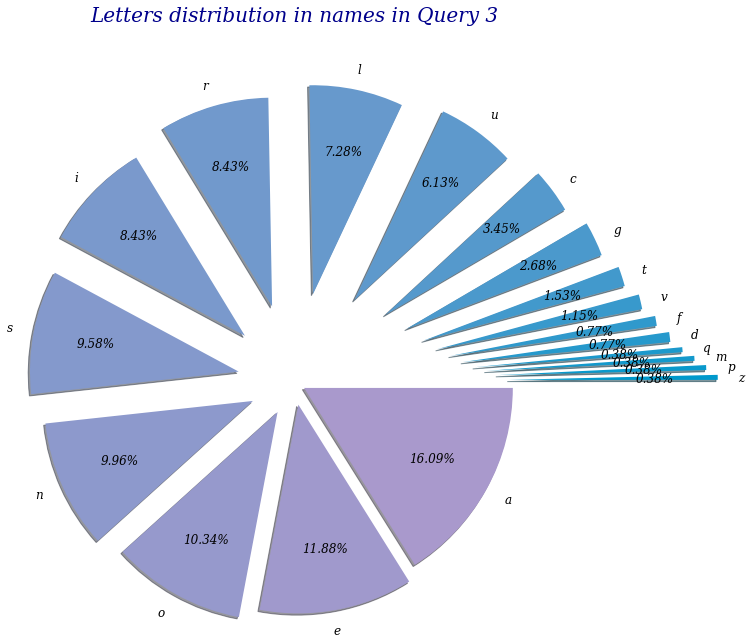

In [112]:
#draw pie chart
import random
fig, ax = plt.subplots( nrows=1, ncols=1 )
explode_0 = list(range(len(df_letters_no_null.index),0,-1))

def aleatColors(numberColors): #he jugat amb els colors, aleatori, zones, i he deixat el que m'agrada més
    listColors=[]
    for i in range(0,numberColors):
        listColors.append([0,0,0])
        listColors[i][0]=((1/numberColors)*i)*0.7 #finalment he tret el factor aleatori però deixo el nom de la funció
        listColors[i][1]=0.6
        listColors[i][2]=0.8
    return listColors
colors= aleatColors(len( list(df_letters_no_null.index)))        
explode =list( map(lambda x: x *0.13, explode_0))
ax.figsize=(0,0)
ax.axis('off')
fontdict_1 = {'family': 'serif','color':  'darkblue','weight': 'normal', 'size': 20, 'style':'oblique'}
fontdict_2 = {'family': 'serif','color':  'black','weight': 'normal', 'size': 12, 'style':'oblique'}#Estil dels títols
ax.pie(list(df_letters_no_null[0]),center=(-1,-1),explode = explode, shadow=True, labels =  list(df_letters_no_null.index), radius=2.4, autopct = '%1.2f%%', colors = colors, textprops = fontdict_2, pctdistance=0.7 )
ax.set_title("Letters distribution in names in Query 3", y=2, pad=35,fontdict=fontdict_1)


# Conclusions:

* Aprenem a connectar amb bases de dades externes. A incorporar registres, modificar-los, exportar dataframes com a taules,... directament des del Notebook amb python. És més fàcil la gestió de BBDD directament des de PHPMyAdmin però és ideal per automatitzar o entrar dades aleatòries per generar BBDD fictícies.

* Aprenem a generar dataframes a partir de les consultes a bases de dades i en grafiquem el resultat.

* Fem servir dues llibreries diferents: Pymysql i MySQLdb.